In [1]:
#%%writefile requirements.txt

####### requirements for project
####### python 3.5

####### lista extensa do environment, depois filtro para os que foram utilizados realmente
#ipython==5.1.0
#jupyter==1.0.0
#matplotlib==1.5.3
#notebook==4.2.3
#pandas==0.18.1
#xlrd==1.0.0
#scikit-learn==0.18.1

####### the following must be installed separately
# 
# 

####### para instalar utilize os seguintes comandos no linux (Ubuntu e similares):
# sudo apt-get install python-pip python-dev
# sudo pip install virtualenv virtualenvwrapper
# echo "export WORKON_HOME=~/envs" >> ~/.bashrc
# echo "source /usr/local/bin/virtualenvwrapper.sh" >> ~/.bashrc
# echo "export PIP_REQUIRE_VIRTUALENV=true" >> ~/.bashrc
# source ~/.bashrc
# mkvirtualenv <env_name> -p /usr/bin/python3
####### substitua <env_name> pelo nome de preferência para seu ambiente virtual
# pip install -r requirements.txt

# Evasão

In [2]:
transformacao_colunas = True

In [3]:
import pandas as pd

data = pd.read_excel('../../bd/BANCO_FINAL.xlsx')

In [4]:
# TODO: Calculate number of students
n_students = data.shape[0]

# TODO: Calculate number of features
n_features = len(data.columns[:-2])

# TODO: Calculate passing students
n_curso = data[data.DESISTENTE == 'SIM'].shape[0]

# TODO: Calculate failing students
n_desistentes = data[data.DESISTENTE == 'NÃO'].shape[0]

# TODO: Calculate graduation rate
grad_rate = 1 - n_desistentes/n_students

# Print the results
print ("Número total de estudantes: {}".format(n_students))
print ("Número de características: {}".format(n_features))
print ("Número de estudantes em curso: {}".format(n_curso))
print ("Número de estudantes desistentes: {}".format(n_desistentes))
print ("Taxa de desistentes: {:.2f}%".format(grad_rate*100))

Número total de estudantes: 7156
Número de características: 26
Número de estudantes em curso: 2137
Número de estudantes desistentes: 5019
Taxa de desistentes: 29.86%


In [5]:
print(list(data.columns.values))

['INGRESSOCPF', 'CAMPUS', 'ANO', 'DESISTENTE', 'SITUAÇÃO', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'CR', 'renda sm', 'Pessoas que vivem com essa renda', 'renda per']


In [6]:
# Extract feature columns
feature_cols = ['CAMPUS', 'ANO', 'Q1', 'Q2', 'Q3', 
                'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9',
                'Q10', 'Q11', 'Q12', 'Q13', 'Q14',
                'Q15', 'Q16', 'Q17', 'Q18', 'Q19',
                'CR', 'renda sm',
                'Pessoas que vivem com essa renda', 'renda per']

# Extract target column 'passed'
target_col = ['DESISTENTE']

# Show the list of columns
print ("Feature columns:\n{}".format(feature_cols))
print ("\nTarget column: {}".format(target_col))

Feature columns:
['CAMPUS', 'ANO', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'CR', 'renda sm', 'Pessoas que vivem com essa renda', 'renda per']

Target column: ['DESISTENTE']


# Início de tratamentos para ML

In [7]:
#from sklearn.externals import joblib

In [8]:
transformar_em_numeros = False

if transformar_em_numeros:
    from sklearn import preprocessing
    
    ## Vamos tornar os atributos em números 
    le = preprocessing.LabelEncoder()
    dicionario = []
    features_ = feature_cols.copy()
    ## removendo os atributos que não precisam ser transformados em números
    features_.remove('renda sm')
    features_.remove('Pessoas que vivem com essa renda')
    features_.remove('renda per')
    features_.remove('ANO')
    features_.remove('CR')
    features_.remove('Q9')
    features_.append(target_col[0])
    print(features_)
    
    for i in features_:
        dicionario.extend(list(data[i]))
    
    le.fit(dicionario)
    for i in features_:
        data[i] = list(le.transform(data[i]))

In [9]:
# Separate the data into feature data and target data (X_all and y_all, respectively)
X_all = data[feature_cols]
y_all = data[target_col]

## Show the feature information by printing the first five rows
#print ("Feature values:")
#print (X_all.head())

In [10]:
tranformacao_1_para_n = True

if tranformacao_1_para_n:
    def preprocess_features(X):
        ''' Preprocesses the student data and converts non-numeric binary variables into
            binary (0/1) variables. Converts categorical variables into dummy variables. '''

        # Initialize new output DataFrame
        output = pd.DataFrame(index = X.index)

        # Investigate each feature column for the data
        for col, col_data in X.iteritems():

            # If data type is non-numeric, replace all yes/no values with 1/0
            if col_data.dtype == object:
                col_data = col_data.replace(['SIM', 'NÃO'], [1, 0])

            # If data type is categorical, convert to dummy variables
            if col_data.dtype == object:
                # Example: 'school' => 'school_GP' and 'school_MS'
                col_data = pd.get_dummies(col_data, prefix = col)  

            # Collect the revised columns
            output = output.join(col_data)

        return output

    X_all = preprocess_features(X_all)
    #y_all = preprocess_features(y_all)
#print ("Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns)))

In [11]:
from sklearn.model_selection import train_test_split

# TODO: Set the number of training points
num_train = 5010

# Set the number of testing points
num_test = X_all.shape[0] - num_train

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all,
                                                    test_size=num_test, random_state=42)

# Show the results of the split
print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 5010 samples.
Testing set has 2146 samples.


In [12]:
from time import time
from sklearn.metrics import f1_score

def train_classifier(clf, X_train, y_train, clf_params):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    if False:
        start = time()
        svr = GridSearchCV(clf, clf_params)
        svr.fit(X_train, y_train[0].values)
        end = time()
        clf = svr.best_estimator_
    else:
        start = time()
        clf.fit(X_train, y_train)
        end = time()
    
    # Print the results
    print ("Trained model in {:.4f} seconds".format(end - start))

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    # Print and return results
    print ("Made predictions in {:.4f} seconds.".format(end - start))
    if transformacao_colunas:
        return f1_score(target.values, y_pred, pos_label='SIM')
    else:
        return f1_score(target.values, y_pred, pos_label=54)


def train_predict(clf, X_train, y_train, X_test, y_test, clf_params):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print ("Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train)))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train, clf_params)
    
    # Print the results of prediction for both training and testing
    print ("F1 score for training set: {:.4f}.".format(predict_labels(clf, X_train, y_train)))
    print ("F1 score for test set: {:.4f}.".format(predict_labels(clf, X_test, y_test)))

# Criando os modelos e parâmetros para otimização

# Definindo os tamanhos da base de treino

In [13]:
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

clf_A_params = ""

clf_B_params = { 'criterion' : ('gini', 'entropy'),
           'min_samples_split' : (2, 10, 40),
           'min_samples_leaf' : (1, 3, 7, 40)}

clf_C_params = {'n_estimators' : (10, 2, 3, 5, 7),
           'criterion' : ('gini', 'entropy'),
           'min_samples_split' : (2, 10, 40),
           'min_samples_leaf' : (1, 5, 10, 40)}

clf_D_params = { 'kernel' : ('linear', 'poly', 'rbf')} 

models = {"GaussianNB": [GaussianNB(), clf_A_params],
          "DecisionTreeClassifier": [tree.DecisionTreeClassifier(random_state=42), clf_B_params],
          "Randomized Forest": [RandomForestClassifier(random_state=42), clf_C_params],
          "SVM classifier": [svm.SVC(random_state=42), clf_D_params]}

In [14]:
import random
random.seed(42)

index_1670 = random.sample(range(0, 5009), 1670)
index_3340 = random.sample(range(0, 5009), 3340)
index_5010 = range(5010)

indexes = [index_1670, index_3340, index_5010]

## Treinar, predizer e avaliar

In [15]:
for model_name, model in models.items():
    model, params = model
    print("\n%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%\n")
    print("Testing Model {}\n".format(model_name))
    for size in indexes:
        X_train_i = X_train.iloc[size]
        y_train_i = y_train.iloc[size]
        train_predict(model, X_train_i, y_train_i, X_test, y_test, params)
        print("---------------------------------------\n")


%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

Testing Model Randomized Forest

Training a RandomForestClassifier using a training set size of 1670. . .
Trained model in 0.0184 seconds
Made predictions in 0.0024 seconds.
F1 score for training set: 0.9815.
Made predictions in 0.0034 seconds.
F1 score for test set: 0.7394.
---------------------------------------

Training a RandomForestClassifier using a training set size of 3340. . .
Trained model in 0.0289 seconds
Made predictions in 0.0045 seconds.
F1 score for training set: 0.9791.
Made predictions in 0.0032 seconds.
F1 score for test set: 0.7186.
---------------------------------------

Training a RandomForestClassifier using a training set size of 5010. . .
Trained model in 0.0417 seconds
Made predictions in 0.0102 seconds.
F1 score for training set: 0.9827.
Made predictions in 0.0038 seconds.
F1 score for test set: 0.7480.
---------------------------------------


%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

Testing Model DecisionTreeClass

/home/ricoms/envs/2017evasao/lib/python3.5/site-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()
/home/ricoms/envs/2017evasao/lib/python3.5/site-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()
/home/ricoms/envs/2017evasao/lib/python3.5/site-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


Trained model in 0.0206 seconds
Made predictions in 0.0012 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0011 seconds.
F1 score for test set: 0.6761.
---------------------------------------

Training a DecisionTreeClassifier using a training set size of 5010. . .
Trained model in 0.0397 seconds
Made predictions in 0.0013 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0006 seconds.
F1 score for test set: 0.6729.
---------------------------------------


%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

Testing Model SVM classifier

Training a SVC using a training set size of 1670. . .


/home/ricoms/envs/2017evasao/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Trained model in 0.1325 seconds
Made predictions in 0.0813 seconds.
F1 score for training set: 0.8179.
Made predictions in 0.1025 seconds.
F1 score for test set: 0.7788.
---------------------------------------

Training a SVC using a training set size of 3340. . .
Trained model in 0.3887 seconds
Made predictions in 0.2959 seconds.
F1 score for training set: 0.8068.
Made predictions in 0.1900 seconds.
F1 score for test set: 0.7736.
---------------------------------------

Training a SVC using a training set size of 5010. . .
Trained model in 0.8598 seconds
Made predictions in 0.6450 seconds.
F1 score for training set: 0.8049.
Made predictions in 0.2783 seconds.
F1 score for test set: 0.7660.
---------------------------------------


%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

Testing Model GaussianNB

Training a GaussianNB using a training set size of 1670. . .
Trained model in 0.0022 seconds
Made predictions in 0.0009 seconds.
F1 score for training set: 0.5648.
Made predictions in 0.0011 

# Tabela de resultado

![Tabela comparativa resultados](../resultados/Tabela comparativa resultados.png)

Populating the interactive namespace from numpy and matplotlib


/home/ricoms/envs/2017evasao/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['size', 'random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"
/home/ricoms/envs/2017evasao/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ricoms/Documents/2.Projetos/2017 Evasao/projeto_evasao_unifesp/notebooks com análises/render.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)
/home/ricoms/envs/2017evasao/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when 

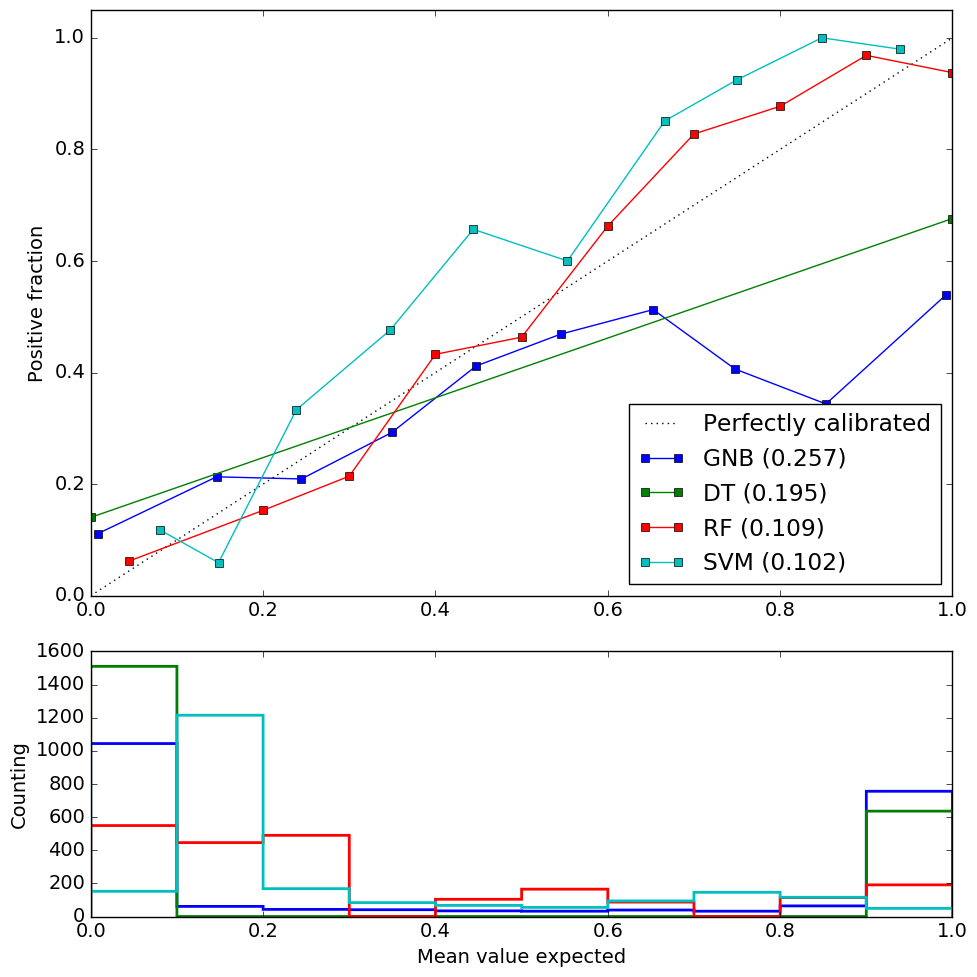

In [16]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 4)
matplotlib.rcParams.update({'font.size': 14})

import matplotlib.pyplot as plt

from sklearn.metrics import (brier_score_loss, precision_score, recall_score, f1_score)
from sklearn.calibration import calibration_curve


# Create classifiers
svc = svm.SVC(random_state=42)
dt = tree.DecisionTreeClassifier(random_state=42)
gnb = GaussianNB()
rf = RandomForestClassifier()
classificadores = [(gnb, 'GNB'),
                      (dt, 'DT'),
                      (rf, "RF"),
                      (svc, 'SVM')]

from render import plot_calibration_curve
plot_calibration_curve( classificadores, X_train, y_train,X_test, y_test, pos_label="SIM" )
plt.show()